# RU29

This is the start of a notebook to plot the RU29 data ourselves.

It uses a python packages called `erddapy` to connect to the glider data server. Before you run this for the first time you need to install `erddapy` in your python environment with the following commands in your terminal/powershell:

`conda install --channel conda-forge erddapy`

In [29]:
import xarray as xr
from erddapy import ERDDAP
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

import datetime as dt

# Connect to glider data server
This code below uses `erddapy` to create a link to the glider data, then uses xarray to download it. This can take a little while! It also doesn't keep the dat on your computer, just loads it into memory for plotting. It will give you the most up to date data whenever you run it

In [5]:

# this creates a link to the RUCOOL server:
e = ERDDAP(
    server="http://slocum-data.marine.rutgers.edu/erddap",
    protocol="tabledap",
    response="nc",
)

# this points at the RU29 glider deployment
# e.dataset_id = "ru29-20200908T1623-trajectory-raw-rt"
# e.dataset_id = 'ru29-20200908T1623-profile-raw-rt'

# get the science data:
e.dataset_id = 'ru29-20200908T1623-profile-sci-rt'

# this connects to the data and load into an xarray
ds = e.to_xarray()
# ds = e.to_pandas()


In [6]:
# print out the long list of data, dims, coords, variables

ds

<xarray.Dataset>
Dimensions:                        (obs: 288475, profile: 307)
Coordinates:
    time                           (obs) datetime64[ns] ...
    latitude                       (obs) float64 ...
    longitude                      (obs) float64 ...
    depth                          (obs) float32 ...
Dimensions without coordinates: obs, profile
Data variables:
    profile_id                     (profile) float64 ...
    rowSize                        (profile) int32 ...
    trajectory                     (obs) object ...
    source_file                    (obs) object ...
    beta_700nm                     (obs) float32 ...
    cdom                           (obs) float32 ...
    chlorophyll_a                  (obs) float32 ...
    conductivity                   (obs) float32 ...
    crs                            (obs) float64 ...
    ctd41cp_timestamp              (obs) datetime64[ns] ...
    density                        (obs) float32 ...
    flbbcd_timestamp               (obs) datetime64[ns] ...
    instrument_adcp                (obs) float64 ...
    instrument_ctd                 (obs) float64 ...
    instrument_flbbcd              (obs) float64 ...
    m_pitch                        (obs) float32 ...
    m_roll                         (obs) float32 ...
    m_science_clothesline_lag      (obs) float32 ...
    platform                       (obs) float64 ...
    potential_temperature          (obs) float32 ...
    pressure                       (obs) float32 ...
    profile_lat                    (obs) float64 ...
    profile_lon                    (obs) float64 ...
    profile_time                   (obs) datetime64[ns] ...
    salinity                       (obs) float32 ...
    sci_ad2cp_bottom_track_signal  (obs) float32 ...
    sci_ad2cp_file_state           (obs) float32 ...
    sci_ad2cp_run_state            (obs) float32 ...
    sci_ad2cp_surface_state        (obs) float32 ...
    sci_m_disk_free                (obs) float32 ...
    sci_m_present_time             (obs) datetime64[ns] ...
    sci_water_pressure             (obs) float32 ...
    sound_speed                    (obs) float32 ...
    temperature                    (obs) float32 ...
    u                              (obs) float32 ...
    v                              (obs) float32 ...
    water_depth                    (obs) float32 ...
Attributes:
    cdm_data_type:                   Profile
    cdm_profile_variables:           profile_id
    comment:                         Deployed by Antonio Farchetti, Kenique L...
    contributor_name:                Scott Glenn,Oscar Schofield,Travis Miles...
    contributor_role:                Principal Investigator,Principal Investi...
    Conventions:                     CF-1.6, COARDS, ACDD-1.3
    creator_email:                   kerfoot@marine.rutgers.edu
    creator_institution:             Rutgers University
    creator_name:                    John Kerfoot
    creator_type:                    person
    creator_url:                     https://rucool.marine.rutgers.edu
    date_created:                    2020-09-09T14:01:19Z
    date_issued:                     2020-09-09T14:01:19Z
    date_modified:                   2020-09-09T14:01:19Z
    defaultGraphQuery:               temperature,depth,time&time>=max(time)-1...
    deployment_name:                 ru29-20200908T1623
    Easternmost_Easting:             -63.938824042143295
    featureType:                     Profile
    geospatial_bounds:               POLYGON ((18.1771509614141 -64.805848403...
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds_vertical_crs:  EPSG:5831
    geospatial_lat_max:              18.17940211153476
    geospatial_lat_min:              17.42431
    geospatial_lat_resolution:       0.00001 degree
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              -63.938824042143295
    geospatial_lon_min:              -64.98642
    geospatial_lon_resolution:       0.0000

# Plot glider dives

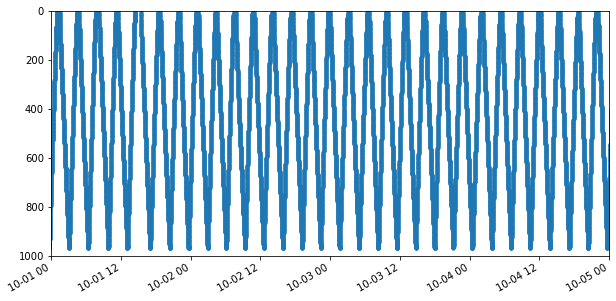

In [19]:
# make the figure biggger:
fig = plt.figure(figsize=(10,5))

plt.plot(ds.time, ds.depth, marker='.', linestyle='')
plt.ylim([1000, 0])

# you can zoom in on some time if you want:
plt.xlim(['2020-10-01', '2020-10-05'])

# this thing makes the dates axis look better:
fig.autofmt_xdate()

# Science plots

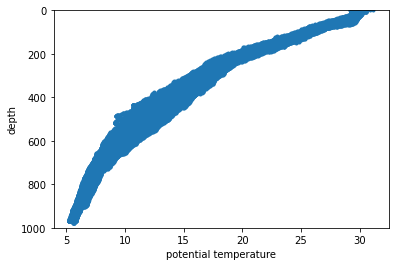

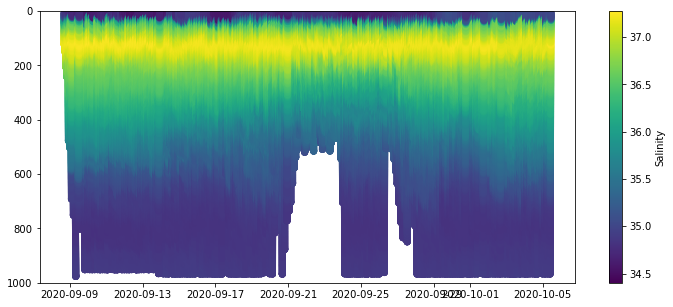

In [28]:

plt.figure()
plt.plot(ds.potential_temperature, ds.depth, '.')
plt.ylabel('depth')
plt.xlabel('potential temperature')
plt.ylim([1000, 0])


# warning, scatter can take a long tiem!
fit = plt.figure( figsize = (12,5))
plt.scatter(ds.time, ds.depth, c=ds.salinity, )
plt.colorbar(label='Salinity')
plt.ylim([1000, 0])
fig.autofmt_xdate()


# make a map

In [70]:
# improve this with cartopy
# need to convert DDMM.MMMM format into DD.DD
lat_deg = float(str(ds.m_gps_lat.values[10])[:2])
lat_min = float(str(ds.m_gps_lat.values[10])[2:])

lat = lat_deg + lat_min/60
lat 

18.17693166666667